#### Import clean data set

In [46]:
import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

with open('cleaned text.pkl', 'rb') as f:
    tweets = pickle.load(f)
    
df = pd.DataFrame(data=tweets, columns=['text'])

# Add a column length of review
df['text_length'] = df['text'].apply(len)

In [47]:
df.head()


,text,text_length
0,suck social distending,24
1,famine strange share message hope life musicv...,124
2,gutta fight clergy public make sure people th...,61
3,easter please remember poor desolate infrast...,75
4,lenibriscoe cut one made recycle safi silk fri...,58


In [48]:
def not_outliers(data, threshold=3):
    '''Returns a list of boolean values indicating if a datum is not an outlier'''
    mean = np.mean(data)
    std = np.std(data)
    return [(datum - mean) / std <= abs(threshold) for datum in data]

# Boolean expresion of regular review length
length_not_outliers = not_outliers(df.loc[:, 'text_length'])

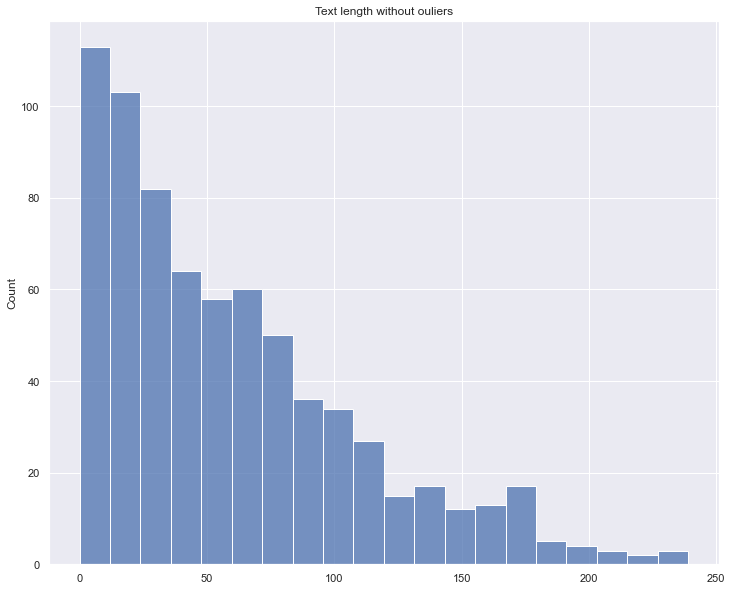

In [49]:
sb.set_theme(style="darkgrid")
fig = plt.figure()
sb.histplot(df[length_not_outliers]["text_length"].values, bins=20).set(title="Text length without ouliers")
fig.savefig("Text length without ouliers.png")


#### Get n-grams tokens

In [50]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter


def get_most_commons(text_array, n_gram=1):
    '''Return a Counter of n_grams-model tokens'''
    text = ' '.join(text_array).strip()
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n_gram)
    counter = Counter(n_grams).most_common(20)
    return [(' '.join(i[0]), i[1]) for i in counter]

In [51]:
uni_most_commons = get_most_commons(tweets)
bi_most_commons = get_most_commons(tweets, 2)
tri_most_commons = get_most_commons(tweets, 3)

In [52]:
def to_df(c, col1, col2):
    '''Returns a DataFrame of most-common-tokens with two columns'''
    return pd.DataFrame(data=c, columns=[col1, col2])


df_uni = to_df(uni_most_commons, 'token', 'frequency')
df_bi = to_df(bi_most_commons, 'token', 'frequency')
df_tri = to_df(tri_most_commons, 'token', 'frequency')

#### Visualization

In [53]:
def visualize_ngrams(df, title):
    '''Create a line plot out of a DataFrame object with token and frequency as columns'''
    sb.set(rc={"figure.figsize": (12, 10)})
    sb.lineplot(data=df, x='token', y='frequency').set(title=title)
    plt.xticks(rotation=45);

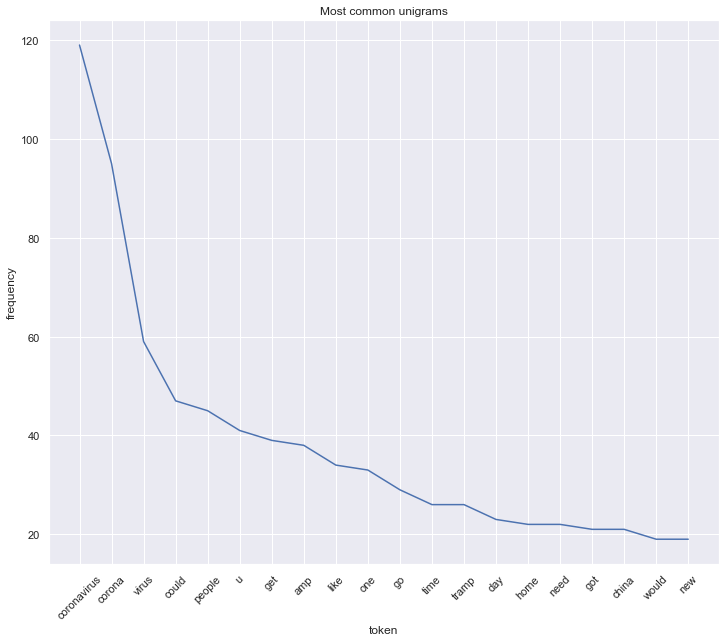

In [54]:
visualize_ngrams(df_uni, 'Most common unigrams')

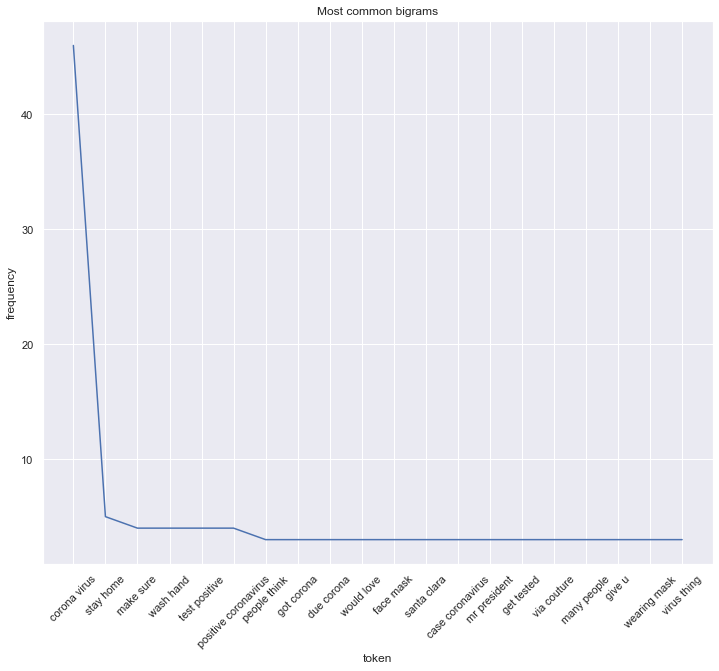

In [55]:
visualize_ngrams(df_bi, 'Most common bigrams')

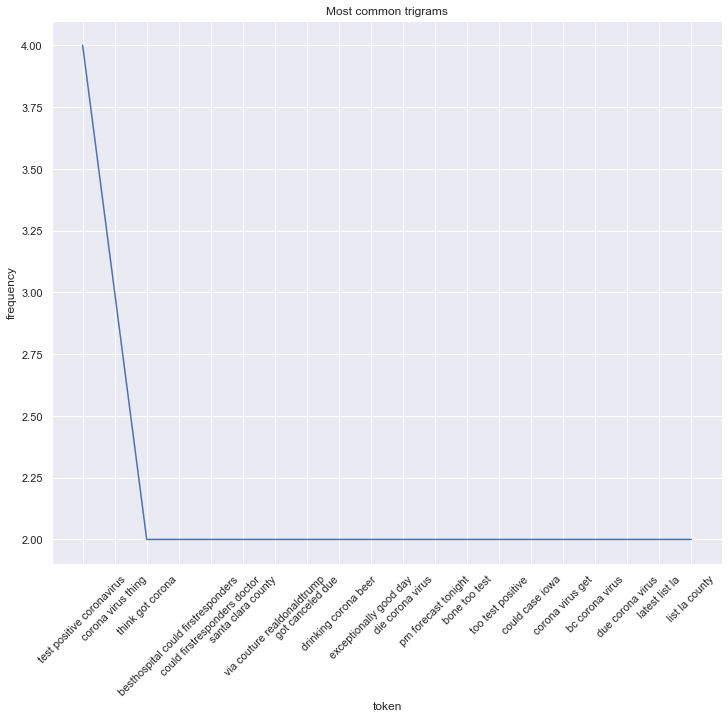

In [56]:
visualize_ngrams(df_tri, 'Most common trigrams')

The charts indicate that Corona virus is the most popular topic of all tweets.

#### Play with Word Cloud

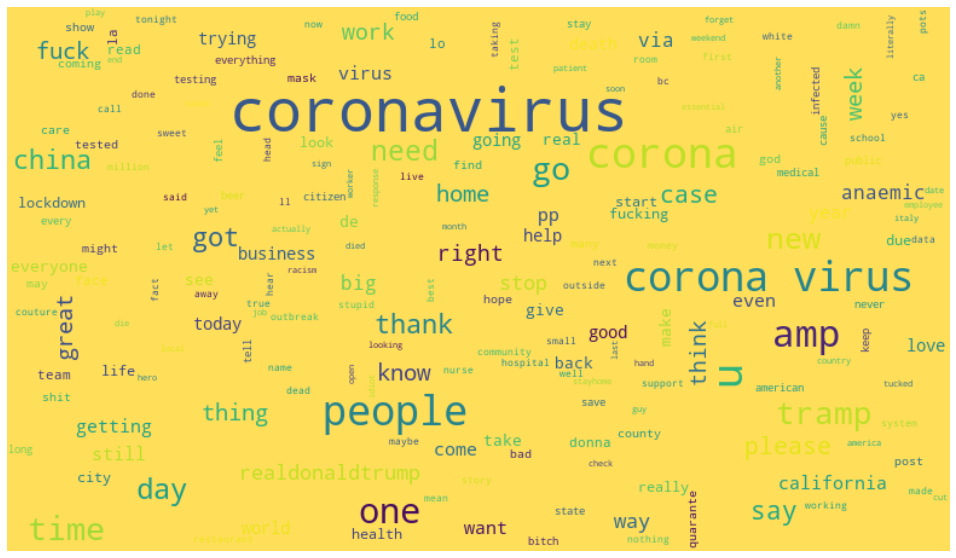

In [57]:
from wordcloud import WordCloud

# Generate a word cloud image of document
wordcloud = WordCloud(width=780, height=450, max_font_size=50,
                      background_color="#ffde59").generate(' '.join(tweets))

# Display the generated image:
fig = plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
fig.savefig('Word cloud.png')